# Logistic Regression

`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes. 
Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then be mapped to two or more discrete classes.

Logistic regression can be used for:
1. Binary Classification (2 variables)
2. Multi-class Classification (more than 2 variables)
3. One-vs-Rest Classification (pridicting one variable with the help of all the other variables)

## Assumptions of Logistic regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [1]:
# importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [7]:
# import the dataset:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **handle missing values**:

In [32]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
df['age'] = df[['age']].fillna(df['age'].median())
df['fare'] = df[['fare']].fillna(df['fare'].median())

In [14]:
# drop the columns:
df.drop(['deck'], axis=1 , inplace=True)

In [21]:
# impute the missing values in the embarked and embark_town column using mode:

df['embarked'] = df[['embarked']].fillna(df['embarked'].mode()[0])
df['embark_town'] = df[['embark_town']].fillna(df['embark_town'].mode()[0])

In [22]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### now all the missing values are imputed!

## **feature_encoding:**

In [23]:
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


## **Select the feature `X` and target/label `y`**:

In [24]:
X = df.drop(['survived'], axis=1)
y = df['survived']

## **train test split the data**:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8)

## **call the model**:

In [26]:
model = LogisticRegression()

## **fit the model**:

In [27]:
model.fit(X_train, y_train)

c:\Users\Muhammad Faizan\.conda\envs\python_machinelearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Predict the model**:

In [28]:
y_pred = model.predict(X_test)

## **Evaluate the model:**

In [29]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Confusion Matrix: [[116   0]
 [  0  63]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        63

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

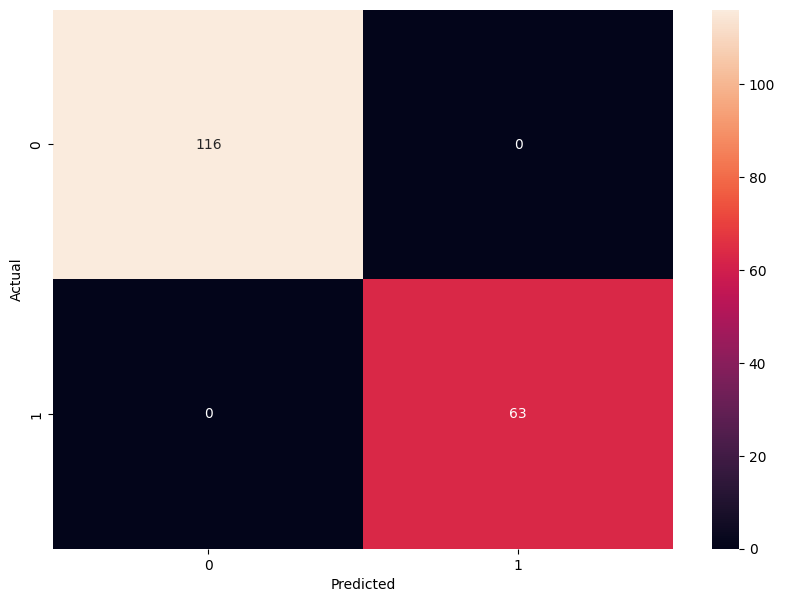

In [31]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **Save the model**:

In [33]:
import pickle
pickle.dump(model, open('LogisticRegression.pkl', 'wb'))

In [34]:
load_model = pickle.load(open('LogisticRegression.pkl', 'rb'))

In [ ]:
# for pridicting any new data, we have to enter all the values of the columns that were included in `X`:

load_model.predict([['values of all the columns that were included in `X`....']])

---
### So, we practiced the Logistic Regression and saw how it is used for classification...


---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389